بطور کلی 2 دسته فیلتر داریم:فیلترهای پایین گذرکه برای حذف نویز از تصویر و بلور کردن آن استفاده میشوند-فیلترهای بالاگذر که برای پیدا کردن لبه ها استفاده میشوند

# بلورکردن تصویر

# میانگین گیری

output = cv2.blur(image,kSize)

kSize = ابعاد کرنلی که روی تصویر حرکت داده میشود(ام*ام وفرد) وهر بار مجموع رنگ پیکسل هایی که درونش قرار میگیرند دریک روی سایز کرنل ضرب میشود وبعنوان پیکسل مرکز کرنل مقدار میگیرد

k = (m*m)

In [1]:
import cv2
import numpy as np

img = cv2.imread("pelak.jpeg")
#np.float64(image)
#noise = np.random.randn(*image.shape)*50
#img = image+noise
#img = np.uint8(np.clip(img,0,255))
#kernel = np.ones((3,3),np.float32)

blur9 = cv2.blur(img,(3,3))
blur64 = cv2.blur(img,(7,7))
blur121 = cv2.blur(img,(11,11))

blureed = np.vstack((np.hstack((img,blur9)),np.hstack((blur64,blur121)))) 


cv2.imshow("bp",blureed)
cv2.waitKey(0)
cv2.destroyWindow("bp")

# فیلتر گاوسی

برای صاف کردن تصویر و حذف نویز استفاده میشود

در این فیلتر رنگ پیکسل های اطزاف مرکز کرنل روی رنگ پیکسل مرکزی تاثیر بیشتری دارند

output = cv2.GaussianBlur(image,kSize,sigmaX,sigmaY)

kSize = m*m

sigmaX,sigmaY = میزان انحراف معیار فیلتر گاوسی نسبت به محورهای افقی و عمودی که پیشفرض صفر است

In [3]:
import cv2
import numpy as np

img = cv2.imread("pelak.jpeg")
#np.float64(image)
#noise = np.random.randn(*image.shape)*50
#img = image+noise
#img = np.uint8(np.clip(img,0,255))

blur9 = cv2.GaussianBlur(img,(3,3),0)
blur64 = cv2.GaussianBlur(img,(7,7),0)
blur121 = cv2.GaussianBlur(img,(11,11),0)

blureed = np.vstack((np.hstack((img,blur9)),np.hstack((blur64,blur121)))) 


cv2.imshow("bp",blureed)
cv2.waitKey(0)
cv2.destroyWindow("bp")

# فیلتر میانه

در این حالت بیشترین مقدار رنگ پیکسلی که در کرنل وجود دارد به پیکسل مرکزی اختصاص داده میشود-ابعاد کرنل کوچک گرفته میشود
کاربرد بازسازی تصاویر

کاربرد بازسازی تصاویر قدیمی 

output = cv2.medianBlur(image,kSize)

kSize = m

In [3]:
import cv2
import numpy as np

img = cv2.imread("pelak.jpeg")
#np.float64(image)
#noise = np.random.randn(*image.shape)*50
#img = image+noise
#img = np.uint8(np.clip(img,0,255))

Mblur9 = cv2.medianBlur(img,1)
Mblur64 = cv2.medianBlur(img,7)
Mblur121 = cv2.medianBlur(img,11)

Mblureed = np.vstack((np.hstack((img,Mblur9)),np.hstack((Mblur64,Mblur121)))) 


cv2.imshow("bp",blureed)
cv2.waitKey(0)
cv2.destroyWindow("bp")

# فیلتر دوطرفه

دراین روش لبه ها حفظ میشود وفیلتر فقط روی پیکسل ها با شدت رنگ کمتر اعمال میشود

output = cv2.bilateralFilter(image,d,sigmaColor,sigmaSpace)

d = یک بعد از ابعاد ماتریس کرنل

sigmaColor = هر چه این مقدار بیشتر باشد تعداد بیشتری از رنگ هایی که در ماتریس هسته وجود دارد در حذف نویز شرکت میکنند

sigmaSpace =هر چه این پارامتر بیشتر باشد پیکسل های دورتر از مرکز ماتریس نیز در تار کردن شرکت خواهند کرد بشرطی که رنگ آنها به قدر کافی مشابه باشد

In [4]:
import cv2
import numpy as np

img = cv2.imread("pelak1.png")
#np.float64(image)
#noise = np.random.randn(*image.shape)*50
#img = image+noise
#img = np.uint8(np.clip(img,0,255))

Bblur9 = cv2.bilateralFilter(img,5,50,50)
Bblur64 = cv2.bilateralFilter(img,7,200,200)
Bblur121 = cv2.bilateralFilter(img,11,200,200)

Bblureed = np.vstack((np.hstack((img,Bblur9)),np.hstack((Bblur64,Bblur121)))) 


cv2.imshow("bp",Bblureed)
cv2.waitKey(0)
cv2.destroyWindow("bp")

# طراحی فیلتر دلخواه


این روش برای بهبود تصویر استفاده میشود

اینجا با تعریف کرنل خاص میتوانیم لبه ها را پیداکنیم(لبه یابی)

output = cv2.filter2ِD(image,ddepth,kernel,mask,delta)

ddepth = نوع فرمت آرایه خروجی را مشخص میکندCV_8U  CV_64F   cv_32F

kernel = ماتریسی که براساس تشخیص خود با مقدارها وابعاد دلخواه میسازیم از نوع اعشاری باید باشد چون میانگین گرفته میشود

mask = استفاده از ماسک به منظور اعمال فیلتر به قسمت دلخواهی از تصویر است

delta =پارامتری ثابت و دلخواه که در پایان با پیکسل های خروجی جمع میشود و پیشفرض 0است



In [5]:
import cv2
import numpy as np

img = cv2.imread("pelak1.png")
#np.float64(image)
#noise = np.random.randn(*image.shape)*50
#img = image+noise
#img = np.uint8(np.clip(img,0,255))

kernel = np.ones((3,3),np.float32)/10
blureed = cv2.filter2D(img,cv2.CV_8U,kernel)#از1- استفاده کردcv2.CV_8Uمیتوان بجای
Fblureed = np.hstack((img,blureed))

cv2.imshow("bp",Fblureed)
cv2.waitKey(0)
cv2.destroyWindow("bp")

# حذف نویز به روش میانگین گیری غیر محلی

در این روش مکان هایی که نویز دارد شناسایی شده و مکان های مشابه آـنها با 4 متد شناسایی شده و جاگزین مقادیر نویز میشود

# دو متدی که از یک تصویر استفاده میکنند

dst = cv2.fastNlMeansDenoising(imag,dst,h,templateWindowsSize,searchWindowsSize)#یک تصویر خاکستری ورودی میگیرد

dst = cv2.fastNlMeansDenoisingColored(imag,dst,h,hcolor,templateWindowsSize,searchWindowsSize)#یک تصویر رنگی ورودی میگیرد

dst= میگیردNoneاگر خروجی مشخص شده باشد 

h=تنظیم قدرت فیلتر-مقادیر بالا نویزها حذف میکند و بعضی اطلاعات را ازبین میبرد-مقادیر پایین اطلاعات را نگه میدارد و بعضی از نویزها را ازبین نمیبرد-توصیه  10

hcolor =است برای اجزای رنگی تصویر تعریف میشود-توصیه 10hهمانند  

templateWindowsSize=اندازه پنجره ای که برای محاسبه وزن ها استفاده میشود-توصیه  7

searchWindowsSize= اندازه پنجره ای که برای محاسبه میانگین وزنی پیکسل ها استفاده میشود توصیه  21

# دومتدی که از تصاویر متوالی استفاده میکنند(بیشتر در تصاویر پشت سرهم دوربین عکاسی استفاده میشود)

dst=cv2.fastNlMeansDenoisingMulti(images,imageToDenoiseIndex,temporalWindowSize,dst,h,templateWindowsSize,searchWindowsSize)#چند تصویر خاکستری ورودی میگیرد


dst=cv2.fastNlMeansDenoisingColoredMulti(images,imageToDenoiseIndex,temporalWindowSize,dst,h,hcolor,templateWindowsSize,searchWindowsSize)#چند تصویر رنگی ورودی میگیرد

images = مجموعه تصاویر متوالی که باید اندازه و تعداد کانالهایشان یکسان باشد

imageDenoiseIndex = اندیس تصویری که فرایند حذف نویز روی آن انجام میشود

temporalWindowsSize=تعداد تصاویری که تصویر پارامتر قبل را احاطه کرده -باید فرد باشد




In [6]:
import cv2
import numpy as np

img = cv2.imread("pelak3.png")
#np.float64(image)
#noise = np.random.randn(*image.shape)*50
#img = image+noise
#img = np.uint8(np.clip(img,0,255))

kernel = np.ones((3,3),np.float32)/10
blureed = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)#از1- استفاده کردcv2.CV_8Uمیتوان بجای
Fblureed = np.hstack((img,blureed))

cv2.imshow("bp",Fblureed)
cv2.waitKey(0)
cv2.destroyWindow("bp")

# ترمیم تصاویر آسیب دیده

در این روش پیکسل های آسیب دیده با رنگ پیکسل های اطرافشان که توسط ماسک مشخص میکنیم،ترمیم میشوند

dst = cv2.inpaint(img,inpaintMask,inpaintRadius,flags)

inpaintMask =ماسکی که در آن قسمت های آسیب دیده به رنگ سفید مشخص شده اند

inpaintRadius=شعاع محدوده ای که پیکسل های درون آن در ترمیم قسمت های آسیب دیده شرکت میکنند

flags=نوع الگوریتم پیاده شده روی تصویر را مشخص میکند-INPAINT_NS & INPAINT_TELEA



In [79]:
import cv2
import numpy as np


def mouse (event,x,y,flags,param):
    global clon1,mask,drawing
    if event == (cv2.EVENT_LBUTTONDOWN):
        drawing = True
        #print(drawing)    
    elif event == (cv2.EVENT_MOUSEMOVE) and drawing == True:
        #print(1)
        cv2.circle(clon1,(x,y),3,(0,0,0),-1)
        cv2.circle(mask,(x,y),3,(255,255,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

        
dst =[]
drawing = False
img = cv2.imread("C:\\Users\\NSC\\Pictures\\ghadimi.jpg")
clon1 = img.copy()
clon2 = img.copy()
dst = np.zeros(img.shape,np.uint8)
mask = np.zeros(img.shape[:2],np.uint8)
cv2.namedWindow("input")
cv2.setMouseCallback("input",mouse)
 
while True:
    key = cv2.waitKey(1)
    if key == ord("i"):
        dst = cv2.inpaint(clon2,mask,1,cv2.INPAINT_TELEA)
    if key == ord("r"):
        clon1 = img.copy()
        dst = np.zeros(img.shape,np.uint8)
        mask = np.zeros(img.shape[:2],np.uint8)
        
    if key == ord("q"):
        break
        
    cv2.imshow("mask",mask)
    cv2.imshow("input",clon1)
    cv2.imshow("output",dst)
cv2.destroyAllWindows()        

# کاهش درخشندگی اجسام

درمواردی که روشناایی جسم زیاد است وبارنگ زمینه برابری میکند برای تشخیص لبه به مشکل میخوریم کاهش درخشندگی اینجا کاربرد دارد

dst = cv2.pyrMeanShiftFiltering(image,sp,sr)

sp = شعاع پنجره هایی که برای تقسیم بندی تصویر به کار میروند

sr =شعاع ناحیه ای را تعیین میکندوپیکسل های درون آن ،در تعیین رنگ پیکسل مرکزی شرکت خواهند داشت


In [1]:
import numpy as np
import cv2


#print(img.shape)
def tranish(x):
    global dst
    dst = cv2.pyrMeanShiftFiltering(img,sp,sr)
    
img = cv2.imread("photo.jpg")
dst = np.ones((img.shape),np.uint8)    
    
cv2.namedWindow("Settings") 
cv2.namedWindow("Filtering")
cv2.createTrackbar("SP","Settings",0,255,tranish)
cv2.createTrackbar("SR","Settings",0,255,tranish)

while True:
    key=cv2.waitKey(1)
    if key==ord("q"):
        break
    sp =cv2.getTrackbarPos("SP","Settings")
    sr =cv2.getTrackbarPos("SR","Settings")
    cv2.imshow('Orginal',img)
    cv2.imshow("Filtering",dst)
    
cv2.destroyAllWindows()        
    
    

# اصلاح گاما

به فرآیند تغییر روشنایی در تصویر بطوریکه برای انسان قابل درک باشد اصطلاحا گاما گفته میشود

     1/G
O = I 

ابتدا پیکسل هل از محدوده [0,255]به محدوده [0,1]منتقل میشوند

O = تصویر خروجی

I = تصویر ورودی   

G =(کوچکتر از 1 تصویرخروجی تاریکتر-بزرگتر از 1 تصویر خروجی روشن تر) پارامتر گاما

درپایان پیکسل هل از محدوده [0,1]به محدوده [0,255]منتقل میشوند




In [1]:
import cv2
import numpy as np

def adjust_gamma(image,gamma):
    invGamma = 1.0 / gamma
    table = []
    
    for i in range(256):
        table.append(((i/255)**invGamma)*255)
    table = np.array((table),dtype='uint8')
    print(table.shape)
    return cv2.LUT(image,table)

original = cv2.imread("pelak1.png")
#print(original)
font = cv2.FONT_HERSHEY_SIMPLEX
for gamma in np.arange(0.0,3.5,0.5):
    if gamma == 1:
        continue
    elif gamma == 0:
        gamma = 0.1
    adjusted = adjust_gamma(original,gamma)
    cv2.putText(adjusted,f"Gamma = {gamma}",(5,10),font,0.8,(0,0,255),2)
    cv2.imshow("Image",np.hstack((original,adjusted)))
    cv2.waitKey(0)
cv2.destroyAllWindows()
    

(256,)
(256,)
(256,)
(256,)
(256,)
(256,)


# cv2.LUT(image,table)اعمال جدول روی تصویر  

# رنگی کردن تصویرخاکستری

را به همراه 12 طیف رنگی آماده کرده تا به کمک آن تصاویر خاکستری را به رنگی تبدیل کنیمapplyColorMap  تابع opencv

dst = cv2.applyColorMap(image,colorMap)

image =تصویر ورودی

colorMap =پارامتر طیف رنگی(جدول پرچمهای مجاز)

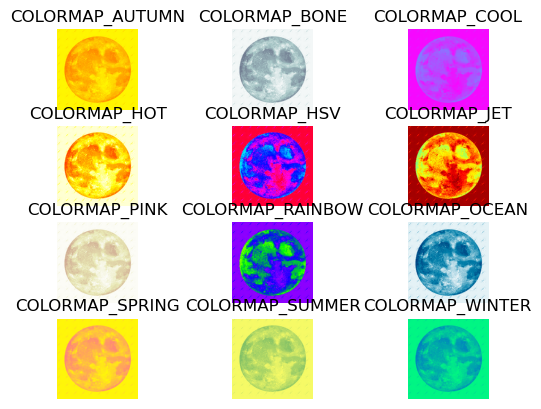

In [44]:
import cv2
from matplotlib import pyplot as plt

COLOR_MAP = (("COLORMAP_AUTUMN",cv2.COLORMAP_AUTUMN),("COLORMAP_BONE",cv2.COLORMAP_BONE),
             ("COLORMAP_COOL",cv2.COLORMAP_COOL),("COLORMAP_HOT",cv2.COLORMAP_HOT),
             ("COLORMAP_HSV",cv2.COLORMAP_HSV),("COLORMAP_JET",cv2.COLORMAP_JET),
             ("COLORMAP_PINK",cv2.COLORMAP_PINK),("COLORMAP_RAINBOW",cv2.COLORMAP_RAINBOW),
             ("COLORMAP_OCEAN",cv2.COLORMAP_OCEAN),("COLORMAP_SPRING",cv2.COLORMAP_SPRING),
             ("COLORMAP_SUMMER",cv2.COLORMAP_SUMMER),("COLORMAP_WINTER",cv2.COLORMAP_WINTER))
image = cv2.imread("mah.jfif")
for i in range(len(COLOR_MAP)):
    dst = cv2.applyColorMap(image,COLOR_MAP[i][1])
    plt.subplot(4,3,i+1)
    plt.title(COLOR_MAP[i][0])
    plt.axis("off")
    plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()   